<a href="https://www.kaggle.com/code/muradpitafi/car-price-prediction?scriptVersionId=154920319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-predictions/sample_submission.csv
/kaggle/input/car-price-predictions/train.csv
/kaggle/input/car-price-predictions/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/car-price-predictions/train.csv')
test = pd.read_csv('/kaggle/input/car-price-predictions/test.csv')

In [3]:
train.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [4]:
train.nunique()

model             5
year             32
motor_type        5
running         643
wheel             1
color            17
type              7
status            5
motor_volume     20
price           294
dtype: int64

In [5]:
train.isna().sum()

model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [7]:
train['running_numeric'] = train['running'].str.extract('(\d+)').astype(float)

# Print the modified DataFratraining
train[['running', 'running_numeric']]

,running,running_numeric
0,3000 km,3000.0
1,132000 km,132000.0
2,95000 miles,95000.0
3,137000 miles,137000.0
4,130000 km,130000.0
...,...,...
1637,120000 miles,120000.0
1638,170000 km,170000.0
1639,68900 miles,68900.0
1640,31000 miles,31000.0


In [8]:
test['running_numeric'] = test['running'].str.extract('(\d+)').astype(float)

# Print the modified DataFratraining
test[['running', 'running_numeric']]

,running,running_numeric
0,24000 km,24000.0
1,85000 miles,85000.0
2,30000 miles,30000.0
3,53000 miles,53000.0
4,230000 km,230000.0
...,...,...
406,33400 km,33400.0
407,60000 miles,60000.0
408,218000 km,218000.0
409,40000 miles,40000.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            1642 non-null   object 
 1   year             1642 non-null   int64  
 2   motor_type       1642 non-null   object 
 3   running          1642 non-null   object 
 4   wheel            1642 non-null   object 
 5   color            1642 non-null   object 
 6   type             1642 non-null   object 
 7   status           1642 non-null   object 
 8   motor_volume     1642 non-null   float64
 9   price            1642 non-null   int64  
 10  running_numeric  1642 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 141.2+ KB


<Axes: xlabel='price', ylabel='Count'>

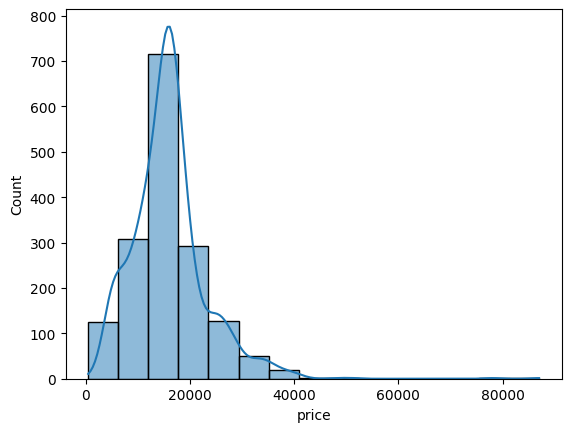

In [10]:
import seaborn as sns
sns.histplot(x='price', data = train, kde = True, bins = 15)

In [11]:
# import numpy as np 

# train['log_price'] = np.log(train['price'])


In [12]:
# sns.histplot(x='log_price', data = train, kde = True, bins = 15)

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings 
warnings.filterwarnings('ignore')

encoder = LabelEncoder()
scaler = StandardScaler()
for i in train.columns:
    if train[i].dtype == 'object':
        train[i] = encoder.fit_transform(train[[i]])
        
        
for i in test.columns:
    if test[i].dtype == 'object':
        test[i] = encoder.fit_transform(test[[i]])        

In [14]:
train.drop(['wheel'], axis = 1, inplace=True)
test.drop(['wheel'], axis = 1, inplace=True)
test.drop(['running'], axis =1, inplace = True)

In [15]:
x = train.drop(['price','running'], axis = 1)
y = train['price']

In [16]:
for i in x.columns:
    x[i] = scaler.fit_transform(x[[i]])

In [17]:
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.22, random_state=4)

In [19]:
linear = LinearRegression(fit_intercept=True)
linear.fit(xtrain, ytrain)
ypred = linear.predict(xtest)

print(' rmse ', np.sqrt(mean_squared_error(ytest, ypred)))

 rmse  4492.557223470284


In [20]:
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=1000)
rfr.fit(xtrain, ytrain)
ypred = rfr.predict(xtest)

print(' mse ', mean_squared_error(ytest, ypred))
print(' rmse ', np.sqrt(mean_squared_error(ytest, ypred)))

 mse  11174444.879183784
 rmse  3342.8198993041465


In [21]:
gbr = GradientBoostingRegressor(learning_rate=0.1,
                                                   max_depth=3,
                                                   n_estimators=150)
gbr.fit(xtrain, ytrain)
ypred = gbr.predict(xtest)

print(' mse ', mean_squared_error(ytest, ypred))
print(' rmse ', np.sqrt(mean_squared_error(ytest, ypred)))

 mse  10289751.9653453
 rmse  3207.7643250939277


In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [23]:

pipeline = make_pipeline(PolynomialFeatures(degree=2),
                         StandardScaler(),
                         GradientBoostingRegressor(learning_rate=0.1,
                                                   max_depth=3,
                                                   n_estimators=150))

In [24]:
pipeline.fit(xtrain, ytrain)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=150))])

In [25]:
pred = pipeline.predict(xtest)
print('rmse ', np.sqrt(mean_squared_error(ytest, pred)))

rmse  3184.1581638526764


In [26]:
train.head()

,model,year,motor_type,running,color,type,status,motor_volume,price,running_numeric
0,4,2022,3,314,15,5,1,2.0,24500,3000.0
1,2,2014,3,93,1,5,1,2.0,25500,132000.0
2,1,2018,3,627,10,5,1,2.0,11700,95000.0
3,2,2002,3,104,6,5,1,3.2,12000,137000.0
4,2,2017,3,89,1,5,2,2.0,26000,130000.0


In [27]:
ridge = Ridge(alpha=0.81)
ridge.fit(xtrain, ytrain)
ypred = ridge.predict(xtest)

print(' mse ', mean_squared_error(ytest, ypred))
print(' rmse ', np.sqrt(mean_squared_error(ytest, ypred)))

 mse  20181115.374339055
 rmse  4492.339632567762


In [28]:
test.head()

,Id,model,year,motor_type,color,type,status,motor_volume,running_numeric
0,0,1,2020,1,1,3,1,2.0,24000.0
1,1,3,2017,1,13,4,1,2.0,85000.0
2,2,0,2021,1,13,3,1,2.0,30000.0
3,3,1,2018,1,11,3,1,2.0,53000.0
4,4,2,2003,1,1,1,4,1.8,230000.0


In [29]:
xtrain.shape

(1280, 8)

In [30]:
tst = test.drop(['model','year'], axis = 1)

In [31]:
tst.shape

(411, 7)

In [32]:
# !pip install tensorflow

In [33]:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential

# model = Sequential()

# model.add(Dense(units = 128, input_dim = xtrain.shape[1], activation ='relu'))
# model.add(Dense(units = 64, activation = 'relu'))
# model.add(Dense(units = 32, activation = 'relu'))
# model.add(Dense(units = 1, activation = 'linear'))

# model.compile(loss= 'mean_squared_error', optimizer = 'adam', metrics = 'mean_squared_error')

In [34]:
# model.fit(xtrain, ytrain, batch_size=64, validation_data=(xtest, ytest), epochs=30)

In [35]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Define the RandomForestRegressor model
# rf_model = RandomForestRegressor()

# # Define the grid of hyperparameters to search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
#                            scoring='neg_mean_squared_error', cv=5, verbose=1)

# # Perform the grid search on your training data
# grid_search.fit(xtrain, ytrain)

# # Print the best hyperparameters found by grid search
# print("Best Hyperparameters:", grid_search.best_params_)

# # Get the best model
# best_rf_model = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_rf_model.predict(xtest)

# # Calculate Mean Squared Error on the test set
# mse = mean_squared_error(ytest, y_pred)
# print(f'Mean Squared Error on Test Set: {mse}')


In [36]:
test.head()

,Id,model,year,motor_type,color,type,status,motor_volume,running_numeric
0,0,1,2020,1,1,3,1,2.0,24000.0
1,1,3,2017,1,13,4,1,2.0,85000.0
2,2,0,2021,1,13,3,1,2.0,30000.0
3,3,1,2018,1,11,3,1,2.0,53000.0
4,4,2,2003,1,1,1,4,1.8,230000.0


In [37]:
test.head()

,Id,model,year,motor_type,color,type,status,motor_volume,running_numeric
0,0,1,2020,1,1,3,1,2.0,24000.0
1,1,3,2017,1,13,4,1,2.0,85000.0
2,2,0,2021,1,13,3,1,2.0,30000.0
3,3,1,2018,1,11,3,1,2.0,53000.0
4,4,2,2003,1,1,1,4,1.8,230000.0


In [38]:
# tst = test.drop(['Id'], axis = 1)
# test_pred = rfr.predict(tst)